In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from index_evaluator import load_authors_data, evaluate_all_with_expert_index
from data_utils import load_author_publications
from index_metrics import (
    h_index, g_index, i10_index, ha_index, ar_index,
    timed_h_index, contemporary_h_index, trend_h_index,
    career_years_h_index_by_average_citations_per_year,
)
from viz_utils import *

In [2]:
# 설정
authors_file = "./gsc_data/authors.all"
data_dir = "./gsc_data/DATA/"
output_file = "all_index_results.csv"
current_year = 2013

In [3]:
# 1. 지수 계산 및 로딩
print("📥 지수 계산 또는 로드 중...")
authors_data = load_authors_data(authors_file)
if not os.path.exists(output_file):
    index_df, max_q, max_r = evaluate_all_with_expert_index(authors_data, data_dir, current_year)
    print(max_q, max_r)
    index_df.to_csv(output_file, index=False)
else:
    index_df = pd.read_csv(output_file)

📥 지수 계산 또는 로드 중...


In [4]:
start_year = 1970
end_year = 2013

authors_data = load_authors_data(authors_file)

for year in range(start_year, end_year + 1):
    expert_by_year_file = f"index_by_{year}.csv"
    if not os.path.exists(expert_by_year_file):
        print(f"📆 전체 author 연도별 지수 계산 중...{expert_by_year_file}")
        index_df, max_q, max_r = evaluate_all_with_expert_index(authors_data, data_dir, year)
        print(max_q, max_r)
        index_df.to_csv(expert_by_year_file, index=False)
        print(f"{year}년도 계산 완료")
    else:
        index_df = pd.read_csv(expert_by_year_file)
        # print(f"{year}년도 로드 완료")
        pass
        # df_expert_by_year = pd.read_csv(expert_by_year_file)
        # print("📂 기존 expert_index_by_year.csv 로드 완료")

In [5]:
authors_data = load_authors_data(authors_file)
    
fixed_year=2013
# Prepare summary list to collect correlation results
summary = []

for increment in range(0, 101, 10):
    a = increment
    b = 100 - increment

    print(f"Calculating expert index for year {fixed_year} with alpha={a}, beta={b}")

    expert_file = f"index_{fixed_year}_a{a}_b{b}.csv"

    if not os.path.exists(expert_file):
        # Load and evaluate authors for the fixed year
        index_df, max_q, max_r = evaluate_all_with_expert_index(
            authors_data, data_dir, current_year=fixed_year, a=a, b=b
        )
        index_df.to_csv(expert_file, index=False)
        print(f"Saved results to {expert_file}")
    else:
        index_df = pd.read_csv(expert_file)
        print(f"Loaded existing results from {expert_file}")

    # Compute Spearman correlation with specific indices
    spearman_corr = index_df.corr(method='spearman')
    # Extract correlations of expert_index with target indices
    summary_row = {
        'a': a,
        'b': b,
        'h': spearman_corr.at['expert_index','h_index'],
        'i10': spearman_corr.at['expert_index','i10_index'],
        'hc': spearman_corr.at['expert_index','contemporary_h_index'],
        'ar': spearman_corr.at['expert_index','ar_index'],
        'h_t5': spearman_corr.at['expert_index','timed_h_index_5']
    }
    summary.append(summary_row)

# After loop, save summary table
summary_df = pd.DataFrame(summary)
summary_df.to_csv(f"expert_corr_summary_{fixed_year}.csv", index=False)
print(f"Summary correlations saved to expert_corr_summary_{fixed_year}.csv")


Calculating expert index for year 2013 with alpha=0, beta=100
Loaded existing results from index_2013_a0_b100.csv
Calculating expert index for year 2013 with alpha=10, beta=90
Loaded existing results from index_2013_a10_b90.csv
Calculating expert index for year 2013 with alpha=20, beta=80
Loaded existing results from index_2013_a20_b80.csv
Calculating expert index for year 2013 with alpha=30, beta=70
Loaded existing results from index_2013_a30_b70.csv
Calculating expert index for year 2013 with alpha=40, beta=60
Loaded existing results from index_2013_a40_b60.csv
Calculating expert index for year 2013 with alpha=50, beta=50
Loaded existing results from index_2013_a50_b50.csv
Calculating expert index for year 2013 with alpha=60, beta=40
Loaded existing results from index_2013_a60_b40.csv
Calculating expert index for year 2013 with alpha=70, beta=30
Loaded existing results from index_2013_a70_b30.csv
Calculating expert index for year 2013 with alpha=80, beta=20
Loaded existing results fr

In [14]:

fixed_year = 2013
authors_data = load_authors_data(authors_file)

# Prepare summary list to collect correlation results
summary = []

# Increment alpha and beta by 10, keeping year fixed at 2013
for increment in range(0, 101, 10):
    a = increment
    b = 100 - increment

    print(f"Calculating expert index for year {fixed_year} with alpha={a}, beta={b}")

    expert_file = f"index_{fixed_year}_a{a}_b{b}.csv"

    if not os.path.exists(expert_file):
        # Load and evaluate authors for the fixed year
        index_df, max_q, max_r = evaluate_all_with_expert_index(
            authors_data, data_dir, current_year=fixed_year, a=a, b=b
        )
        index_df.to_csv(expert_file, index=False)
        print(f"Saved results to {expert_file}")
    else:
        index_df = pd.read_csv(expert_file)
        print(f"Loaded existing results from {expert_file}")

    # Compute Spearman correlation with specific indices
    spearman_corr = index_df.corr(method='spearman')
    # Extract correlations of expert_index with target indices
    summary_row = {
        'a': a,
        'b': b,
        'h': spearman_corr.at['expert_index','h_index'],
        'i10': spearman_corr.at['expert_index','i10_index'],
        'hc': spearman_corr.at['expert_index','contemporary_h_index'],
        'ar': spearman_corr.at['expert_index','ar_index'],
        'h_t5': spearman_corr.at['expert_index','timed_h_index_5'],
        'ha' : spearman_corr.at['expert_index','ha_index']
    }
    summary.append(summary_row)

    # Inside the alpha/beta loop: analyze only top 1% authors (~top 800)
    top_n = max(1, int(0.1 * len(index_df)))  # 1% of total
    if len(index_df) >= top_n:
        top1_df = index_df.nlargest(top_n, 'expert_index')
        top1_corr = top1_df[['expert_index', 'h_index', 'i10_index', 'contemporary_h_index', 'ar_index', 'timed_h_index_5','ha_index']]
        top1_spearman = top1_corr.corr(method='spearman')
        top1_file = f"spearman_corr_top10pct_{fixed_year}_a{a}_b{b}.csv"
        top1_spearman.to_csv(top1_file)
        print(f"Top 10% Spearman correlations saved to {top1_file}")
    else:
        print(f"Index DF has fewer authors than 10% threshold, skipping top1% for a={a}, b={b}")

# After processing all alpha/beta, save summary table
summary_df = pd.DataFrame(summary)
summary_df.to_csv(f"expert_corr_summary_{fixed_year}.csv", index=False)
print(f"Summary correlations saved to expert_corr_summary_{fixed_year}.csv")

# Merge all top1% spearman files into one DataFrame
merged_list = []
for increment in range(0, 101, 10):
    top1_file = f"spearman_corr_top10pct_{fixed_year}_a{increment}_b{100-increment}.csv"
    if os.path.exists(top1_file):
        df_top1 = pd.read_csv(top1_file, index_col=0)
        # flatten correlations of expert_index row
        row = df_top1.loc['expert_index']
        row['a'] = increment
        row['b'] = 100 - increment
        merged_list.append(row)

if merged_list:
    merged_df = pd.DataFrame(merged_list)
    # reorder columns
    cols = ['a','b','h_index','i10_index','contemporary_h_index','ar_index','timed_h_index_5','ha_index']
    merged_df = merged_df[cols]
    merged_df.to_csv(f"merged_top10pct_corr_{fixed_year}.csv", index=False)
    print(f"Merged top1% correlations saved to merged_top10pct_corr_{fixed_year}.csv")
else:
    print("No top1% correlation files found to merge.")


Calculating expert index for year 2013 with alpha=0, beta=100
Loaded existing results from index_2013_a0_b100.csv
Top 10% Spearman correlations saved to spearman_corr_top10pct_2013_a0_b100.csv
Calculating expert index for year 2013 with alpha=10, beta=90
Loaded existing results from index_2013_a10_b90.csv
Top 10% Spearman correlations saved to spearman_corr_top10pct_2013_a10_b90.csv
Calculating expert index for year 2013 with alpha=20, beta=80
Loaded existing results from index_2013_a20_b80.csv
Top 10% Spearman correlations saved to spearman_corr_top10pct_2013_a20_b80.csv
Calculating expert index for year 2013 with alpha=30, beta=70
Loaded existing results from index_2013_a30_b70.csv
Top 10% Spearman correlations saved to spearman_corr_top10pct_2013_a30_b70.csv
Calculating expert index for year 2013 with alpha=40, beta=60
Loaded existing results from index_2013_a40_b60.csv
Top 10% Spearman correlations saved to spearman_corr_top10pct_2013_a40_b60.csv
Calculating expert index for year 2

In [15]:
overall_df = pd.read_csv("expert_corr_summary_2013.csv")
top10_df = pd.read_csv("merged_top10pct_corr_2013.csv")
top1_df = pd.read_csv("merged_top1pct_corr_2013.csv")


In [16]:
indices = {
    'i10': ('i10-index', overall_df['i10'], top10_df['i10_index'], top1_df['i10_index']),
    'hc': ('contemporary h-index', overall_df['hc'], top10_df['contemporary_h_index'], top1_df['contemporary_h_index']),
    'ar': ('ar-index', overall_df['ar'], top10_df['ar_index'], top1_df['ar_index']),
    'h_t5': ('timed h-index (5yr)', overall_df['h_t5'], top10_df['timed_h_index_5'], top1_df['timed_h_index_5']),
    'ha': ('ha-index', overall_df['ha'], top10_df['ha_index'], top1_df['ha_index']),
}


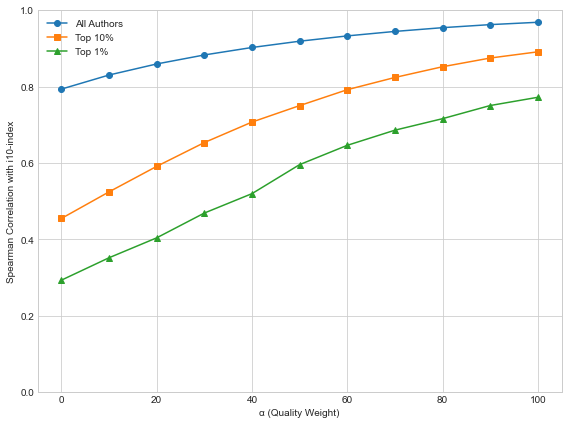

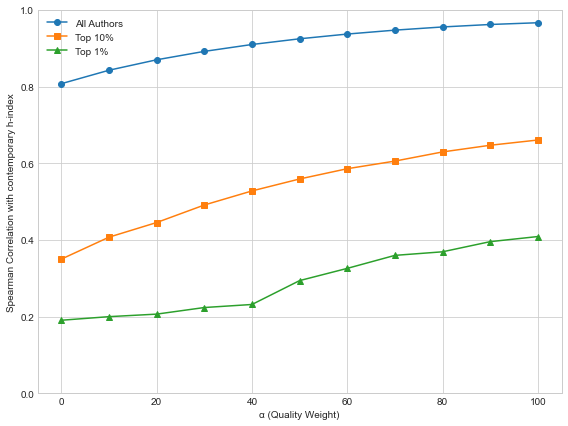

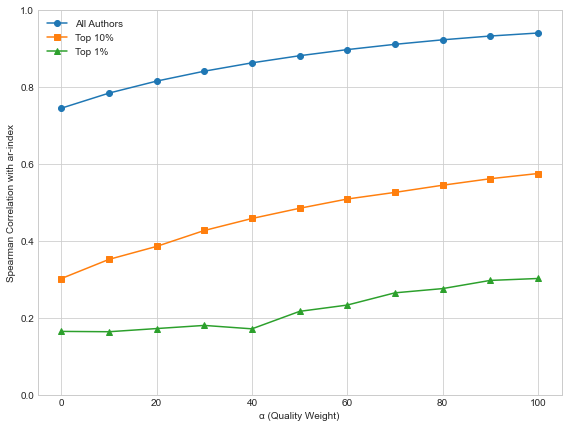

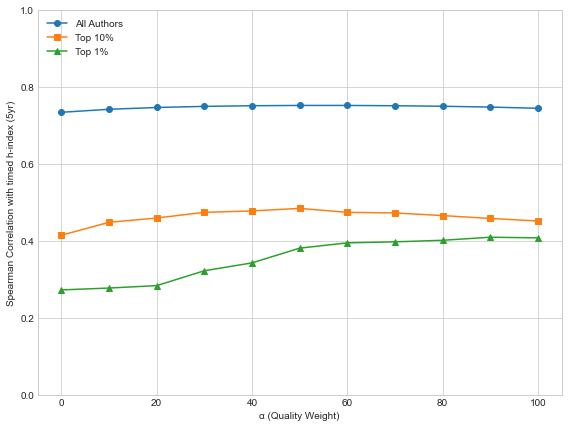

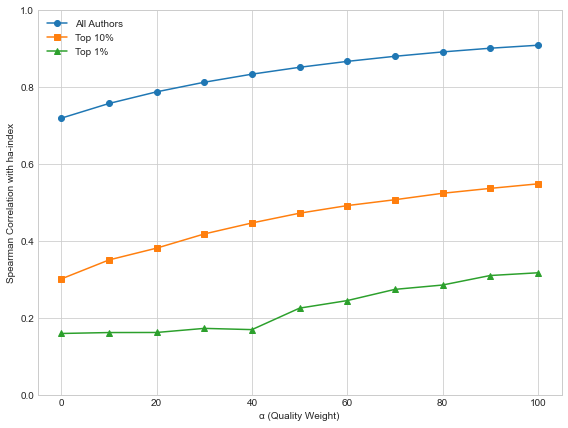

In [32]:
for key, (label, y_all, y_top10, y_top1) in indices.items():
    plt.figure(figsize=(8, 6))
    plt.plot(overall_df['a'], y_all, marker='o', label='All Authors')
    plt.plot(top10_df['a'], y_top10, marker='s', label='Top 10%')
    plt.plot(top1_df['a'], y_top1, marker='^', label='Top 1%')
    # plt.title(f"Comparison of {label} Correlation with Expert Index by α")
    plt.xlabel("α (Quality Weight)")
    plt.ylabel(f"Spearman Correlation with {label}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.ylim(0.0, 1.0)
    plt.legend(loc='upper left')
    plt.show()


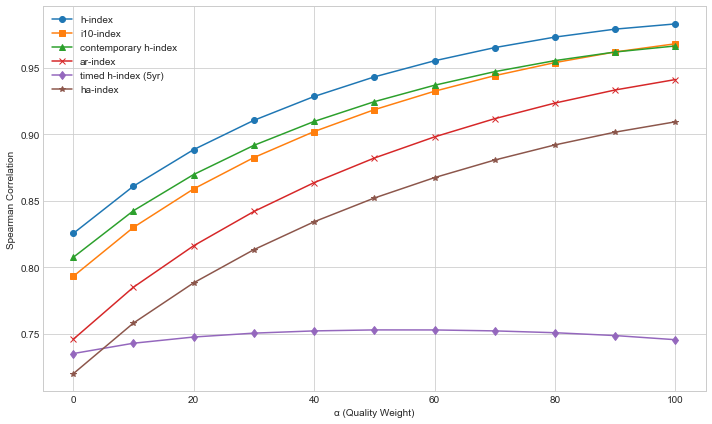

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 전체 집단 요약 데이터 로드
df = pd.read_csv("expert_corr_summary_2013.csv")

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(df['a'], df['h'], marker='o', label='h')
plt.plot(df['a'], df['i10'], marker='s', label='i10')
plt.plot(df['a'], df['hc'], marker='^', label='hc')
plt.plot(df['a'], df['ar'], marker='x', label='ar')
plt.plot(df['a'], df['h_t5'], marker='d', label='h_t5')
plt.plot(df['a'], df['ha'], marker='*', label='ha')  # ha 포함된 최신 버전일 경우

# plt.title("Spearman Correlation with Expert Index by α (Quality Weight)")
plt.xlabel("α (Quality Weight)")
plt.ylabel("Spearman Correlation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


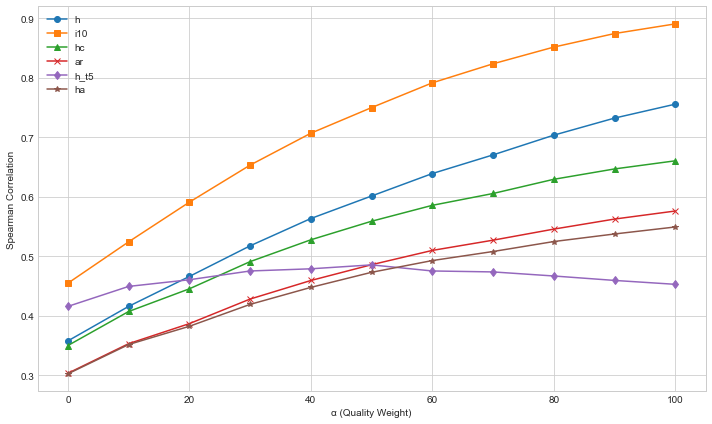

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 전체 집단 요약 데이터 로드
df = pd.read_csv("merged_top10pct_corr_2013.csv")

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
# 'expert_index', 'h_index', 'i10_index', 'contemporary_h_index', 'ar_index', 'timed_h_index_5','ha_index'
plt.plot(df['a'], df['h_index'], marker='o', label='h')
plt.plot(df['a'], df['i10_index'], marker='s', label='i10')
plt.plot(df['a'], df['contemporary_h_index'], marker='^', label='hc')
plt.plot(df['a'], df['ar_index'], marker='x', label='ar')
plt.plot(df['a'], df['timed_h_index_5'], marker='d', label='h_t5')
plt.plot(df['a'], df['ha_index'], marker='*', label='ha')  # ha 포함된 최신 버전일 경우

# plt.title("Spearman Correlation with Expert Index by α (Quality Weight)")
plt.xlabel("α (Quality Weight)")
plt.ylabel("Spearman Correlation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


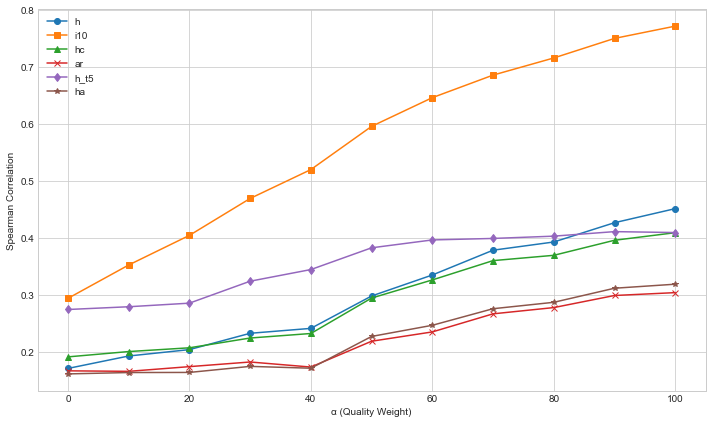

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 전체 집단 요약 데이터 로드
df = pd.read_csv("merged_top1pct_corr_2013.csv")

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
# 'expert_index', 'h_index', 'i10_index', 'contemporary_h_index', 'ar_index', 'timed_h_index_5','ha_index'
plt.plot(df['a'], df['h_index'], marker='o', label='h')
plt.plot(df['a'], df['i10_index'], marker='s', label='i10')
plt.plot(df['a'], df['contemporary_h_index'], marker='^', label='hc')
plt.plot(df['a'], df['ar_index'], marker='x', label='ar')
plt.plot(df['a'], df['timed_h_index_5'], marker='d', label='h_t5')
plt.plot(df['a'], df['ha_index'], marker='*', label='ha')  # ha 포함된 최신 버전일 경우

# plt.title("Spearman Correlation with Expert Index by α (Quality Weight)")
plt.xlabel("α (Quality Weight)")
plt.ylabel("Spearman Correlation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
# 2. 컬럼 이름 축약 및 분석 대상 설정
index_df_short = index_df.rename(columns=INDEX_NAME_MAP)
index_columns = list(INDEX_NAME_MAP.values())

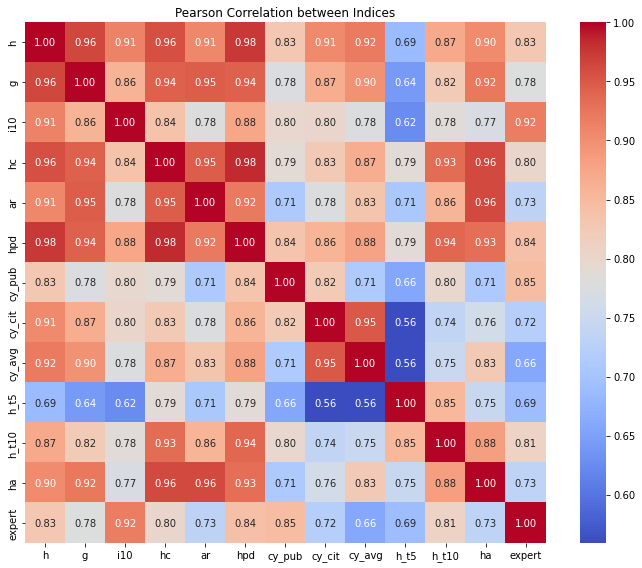

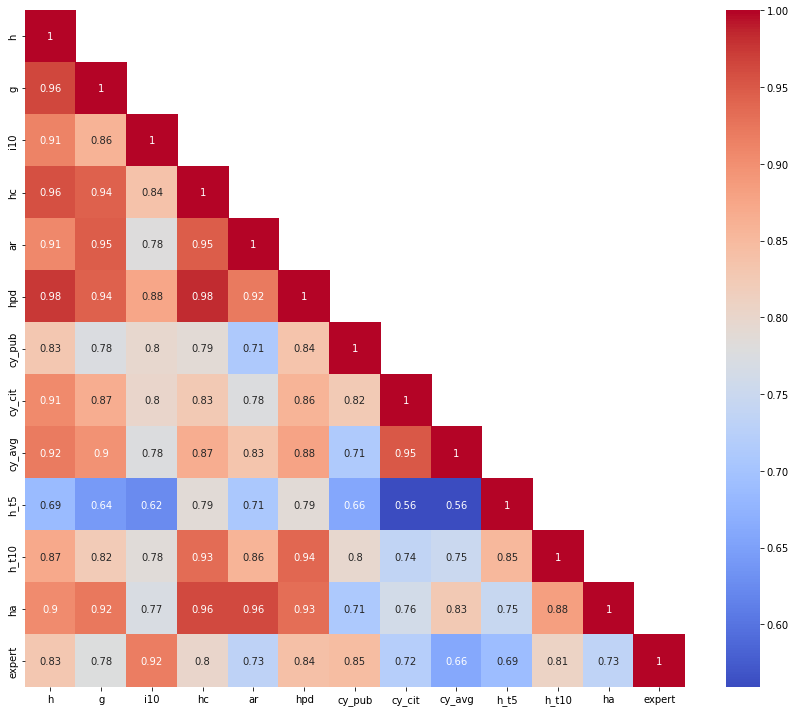

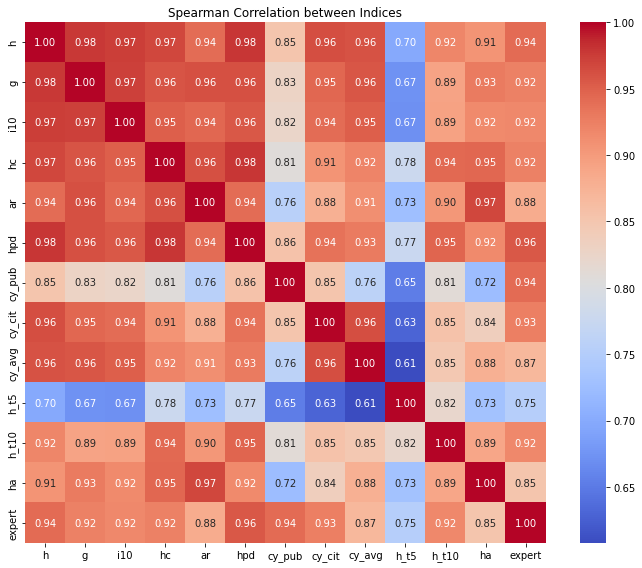

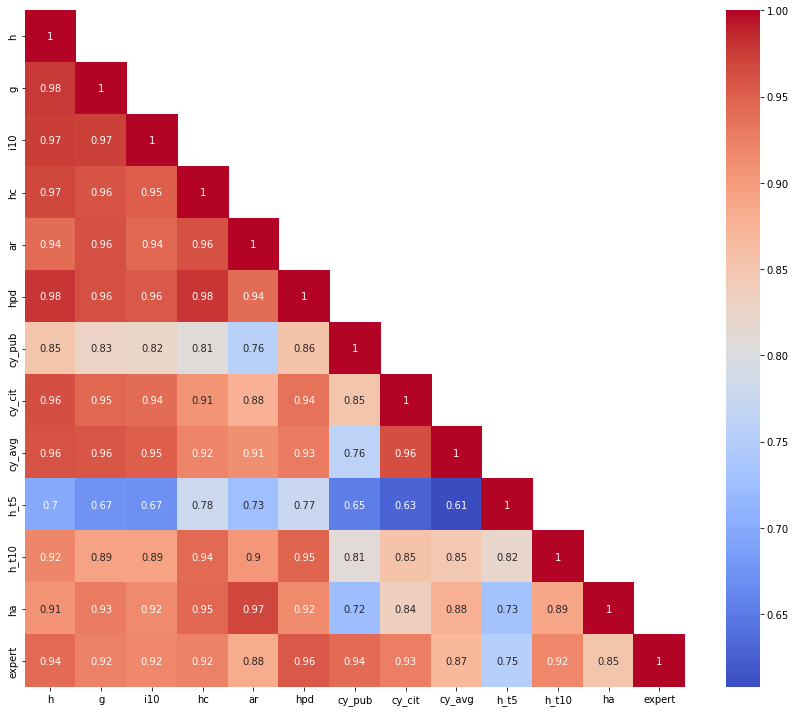

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_pearson = plot_index_correlation_heatmap(index_df, method='pearson')
# print(corr_pearson)
mask = np.triu(np.ones_like(corr_pearson, dtype=bool), k=1)

# 히트맵 출력
plt.figure(figsize=(12, 10))
sns.heatmap(corr_pearson, annot=True, annot_kws={"size": 10}, cmap="coolwarm", mask=mask)
# plt.title("Pearson Correlation between Indices", fontsize=14)
plt.tight_layout()
plt.savefig("pearson_heatmap.png", dpi=600)

corr_spearman = plot_index_correlation_heatmap(index_df, method='spearman')
# print(corr_spearman)

mask = np.triu(np.ones_like(corr_spearman, dtype=bool), k=1)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_spearman, annot=True, annot_kws={"size": 10}, cmap="coolwarm", mask=mask)
# plt.title("Spearman Correlation between Indices", fontsize=14)
plt.tight_layout()
plt.savefig("spearman_heatmap.png", dpi=600)


🔝 Top-K 비교 및 겹침 분석 중...
              h        g      i10       hc       ar      hpd   cy_pub  \
h             1      0.7  0.67125     0.71    0.565  0.77125  0.41125   
g           0.7        1    0.485  0.66125   0.7225   0.6375  0.32375   
i10     0.67125    0.485        1   0.5075  0.38125  0.60875   0.6025   
hc         0.71  0.66125   0.5075        1     0.65  0.84125   0.3475   
ar        0.565   0.7225  0.38125     0.65        1  0.59625    0.265   
hpd     0.77125   0.6375  0.60875  0.84125  0.59625        1  0.40875   
cy_pub  0.41125  0.32375   0.6025   0.3475    0.265  0.40875        1   
cy_cit   0.4525   0.3975  0.44375    0.275   0.2475   0.2925   0.2625   
cy_avg  0.52625  0.50125   0.3925  0.37125  0.33375     0.37   0.1675   
h_t5    0.33375  0.26125   0.3625   0.4475  0.33375  0.46875  0.26375   
h_t10   0.50375  0.40625   0.4975   0.6375  0.46375     0.68  0.35875   
ha       0.5875    0.655  0.39875     0.77     0.75  0.66625   0.2825   
expert   0.5425  0.41875  0

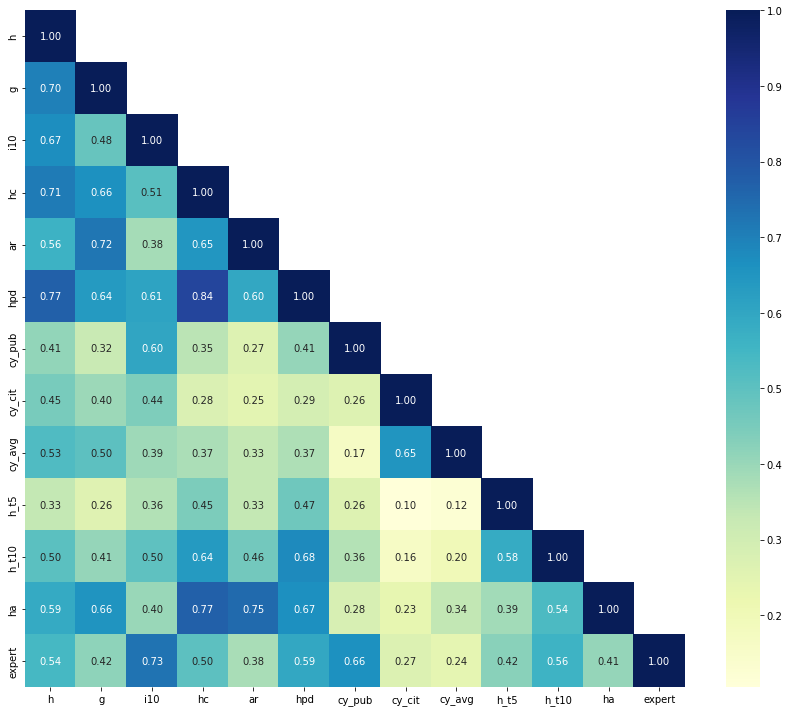

In [7]:
print("🔝 Top-K 비교 및 겹침 분석 중...")
# print_top_k_authors(index_df_short, k=1000, index_columns=index_columns)
overlap_matrix = compute_top_k_overlap_matrix(index_df_short, index_columns, k=800)
print(overlap_matrix)
mask = np.triu(np.ones_like(overlap_matrix, dtype=float), k=1)
plt.figure(figsize=(12, 10))
sns.heatmap(overlap_matrix.astype(float), annot=True, fmt=".2f", annot_kws={"size": 10}, cmap="YlGnBu", mask=mask)
plt.tight_layout()
plt.savefig("top_k_overlap_heatmap.png", dpi=600)

In [8]:
print("🧍 독립 저자 분석 중...")
authors_count = 0
unique_authors_by_index = find_index_specific_top_k_authors(index_df_short, index_columns, k=5)
for idx, authors in unique_authors_by_index.items():
    print(f"🔹 {idx} 지수에만 Top-K로 포함된 저자 {len(authors)}명: {authors}")
    authors_count += len(authors)

print(authors_count)
# print(unique_authors_by_index)


🧍 독립 저자 분석 중...
🔹 h 지수에만 Top-K로 포함된 저자 0명: set()
🔹 g 지수에만 Top-K로 포함된 저자 1명: {'7EelTwgAAAAJ'}
🔹 i10 지수에만 Top-K로 포함된 저자 0명: set()
🔹 hc 지수에만 Top-K로 포함된 저자 1명: {'g-_ZXGsAAAAJ'}
🔹 ar 지수에만 Top-K로 포함된 저자 2명: {'D7CrQZkAAAAJ', 'ZH31nVgAAAAJ'}
🔹 hpd 지수에만 Top-K로 포함된 저자 1명: {'Jde99xEAAAAJ'}
🔹 cy_pub 지수에만 Top-K로 포함된 저자 2명: {'c17D_ggAAAAJ', 'ZSpW_doAAAAJ'}
🔹 cy_cit 지수에만 Top-K로 포함된 저자 1명: {'olM19WIAAAAJ'}
🔹 cy_avg 지수에만 Top-K로 포함된 저자 1명: {'duBlF_YAAAAJ'}
🔹 h_t5 지수에만 Top-K로 포함된 저자 5명: {'NTY8RY8AAAAJ', 't53jWtYAAAAJ', 'zEQGLhoAAAAJ', '775UehEAAAAJ', 'Q0LxuhIAAAAJ'}
🔹 h_t10 지수에만 Top-K로 포함된 저자 1명: {'A9e6sPYAAAAJ'}
🔹 ha 지수에만 Top-K로 포함된 저자 1명: {'sUVeH-4AAAAJ'}
🔹 expert 지수에만 Top-K로 포함된 저자 2명: {'Hl5HymUAAAAJ', 'nhL9PHwAAAAJ'}
18


🔢 Top-K 확장에 따른 고유 저자 수 시각화 중...


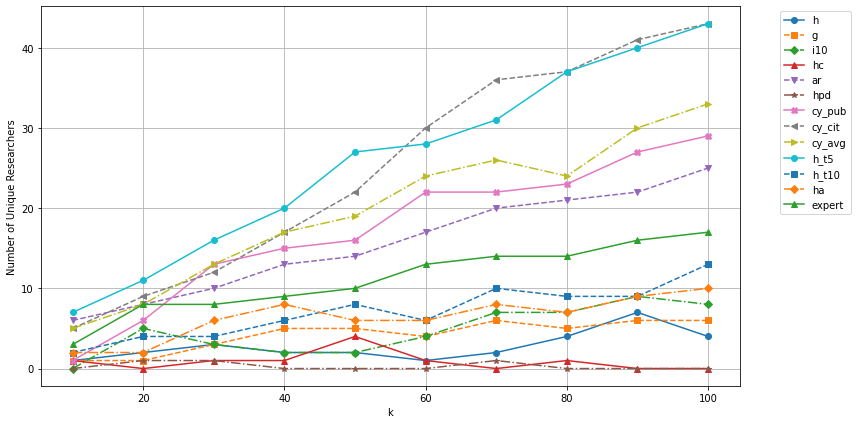

      index    k  unique_authors
0         h   10               1
1         g   10               1
2       i10   10               0
3        hc   10               1
4        ar   10               6
5       hpd   10               0
6    cy_pub   10               1
7    cy_cit   10               5
8    cy_avg   10               5
9      h_t5   10               7
10    h_t10   10               2
11       ha   10               2
12   expert   10               3
13        h   20               2
14        g   20               1
15      i10   20               5
16       hc   20               0
17       ar   20               8
18      hpd   20               1
19   cy_pub   20               6
20   cy_cit   20               9
21   cy_avg   20               8
22     h_t5   20              11
23    h_t10   20               4
24       ha   20               2
25   expert   20               8
26        h   30               3
27        g   30               3
28      i10   30               3
29       h

In [9]:
print("🔢 Top-K 확장에 따른 고유 저자 수 시각화 중...")
k_range = list(range(10, 110, 10))
author_counts_by_k = plot_unique_author_counts_by_k(index_df_short, index_columns, k_values=k_range)
print(author_counts_by_k)

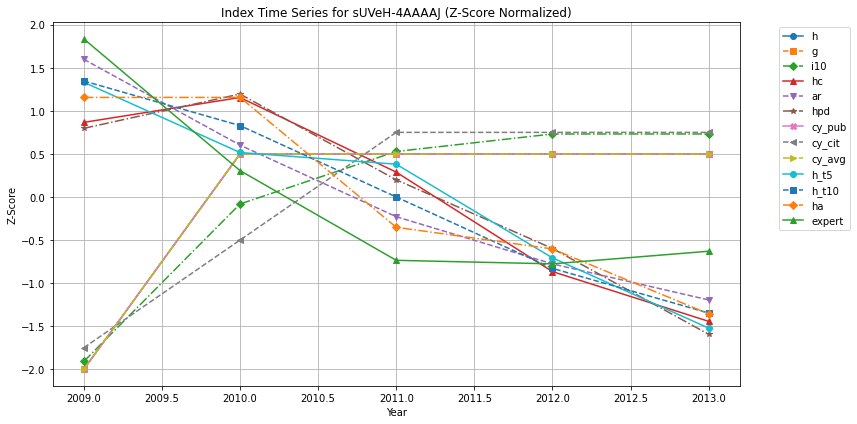

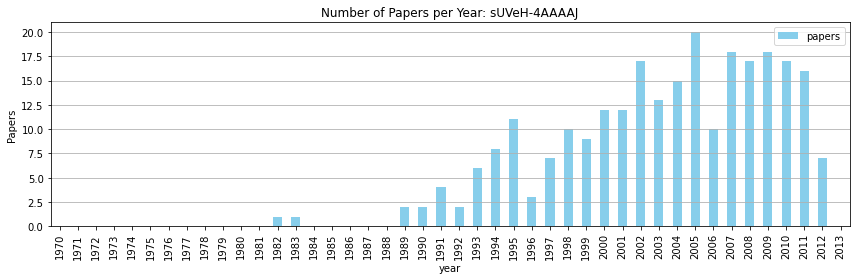

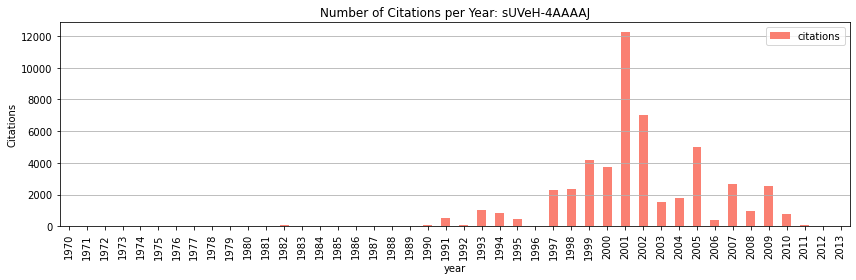

In [59]:
from data_utils import load_author_index_time_series
from viz_utils import plot_author_index_and_activity_time_series

author_id = "sUVeH-4AAAAJ"
index_df_single = load_author_index_time_series(author_id, "./", 2009, 2013)
plot_df, paper_stats = plot_author_index_and_activity_time_series(author_id, index_df_single, data_dir)


In [60]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 2. 설정 ---
current_year = 2013

summary_stats = []
temporal_activity = defaultdict(list)

top_k_dict = get_top_k_authors(index_df, k=800, index_cols=None)

# --- 3. 데이터 분석 ---
for index_name, author_ids in top_k_dict.items():
    for author_id in author_ids:
        df = load_author_publications(data_dir, author_id, current_year)
        df = df[(df["year"] >= 1970) & (df["year"] <= current_year)]  # ✅ 연도 필터링
        if df.empty:
            continue

        first_year = df["year"].min()
        last_year = df["year"].max()
        career_years = last_year - first_year + 1

        # 기초 통계
        summary_stats.append({
            "index": index_name,
            "author_id": author_id,
            "papers": len(df),
            "total_citations": df["citations"].sum(),
            "avg_citations": df["citations"].mean(),
            "recent_5y_citations": df[df["year"] >= current_year - 5]["citations"].sum(),
            "career_years": career_years,
            "avg_year": df["year"].mean()
        })

        # 연도별 인용 수 저장
        year_group = df.groupby("year")["citations"].sum()
        for year, c in year_group.items():
            temporal_activity[(index_name, year)].append(c)

# --- 4. 통계 테이블 생성 ---
summary_df = pd.DataFrame(summary_stats)

print("\n📊 [Summary of Basic Statistics for Independent Authors]")
summary_table = summary_df.groupby("index").agg({
    "papers": ["mean", "std"],
    "total_citations": ["mean", "std"],
    "avg_citations": ["mean", "std"],
    "recent_5y_citations": ["mean", "std"],
    "career_years": ["mean", "std"],
    "avg_year": ["mean", "std"]
}).round(2)


# 📌 추가: 전체 총인용 / 총논문 기반 가중 평균 인용수 계산
weighted_avg_citations = (
    summary_df.groupby("index").apply(lambda df: df["total_citations"].sum() / df["papers"].sum())
).round(2)

# 📌 summary_table에 컬럼으로 추가
summary_table[("avg_citations", "weighted")] = weighted_avg_citations

display(summary_table)

# summary_table.to_excel("independent_author_stats.xlsx")
print("📁 저장 완료: independent_author_stats.xlsx")


📊 [Summary of Basic Statistics for Independent Authors]


papers         total_citations           avg_citations          \
                 mean     std            mean       std          mean     std   
index                                                                           
ar             301.16  291.54        23468.76  15281.60        114.59  119.57   
cy_avg         271.72  200.00        18218.63  15640.75         72.68   51.14   
cy_cit         348.04  352.92        16151.16  14676.71         53.63   47.23   
cy_pub         530.69  411.50        14888.44  14868.28         30.05   27.29   
expert         528.70  418.13        17652.79  15461.62         39.35   35.62   
g              342.14  280.12        24317.94  14476.66         88.07   61.28   
h              393.07  279.70        22516.06  14653.93         67.89   47.87   
h_t10          377.52  401.07        16844.43  14531.25         54.32   45.14   
h_t5           328.99  416.37        12747.32  14399.18         44.92   40.75   
ha             311.56  287.95        22122.01  15680.14         92.96   84.12   
hc             352.48  282.38        21887.46  15334.11         75.27   56.52   
hpd            388.08  287.65        21547.56  15048.28         65.91   46.61   
i10            490.28  403.03        19239.36  14832.56         45.47   34.40   
quality_score  503.27  421.04        19608.75  15070.65         47.14   38.63   
recency_score  518.37  421.99        11554.80  13921.37         22.28   22.16   

              recent_5y_citations          career_years       avg_year        \
                             mean      std         mean   std     mean   std   
index                                                                          
ar                        1789.11  2035.75        28.03  8.99  2002.11  3.93   
cy_avg                     759.02  1142.75        36.86  4.91  1997.44  3.66   
cy_cit                     634.99   860.25        39.06  3.54  1996.64  3.32   
cy_pub                    1090.90  1339.78        31.62  6.92  2001.72  3.07   
expert                    1501.01  1514.79        30.13  7.64  2002.80  3.14   
g                         1318.19  1673.48        32.40  7.62  2000.14  4.08   
h                         1392.28  1644.93        32.81  7.25  2000.31  3.82   
h_t10                     1821.47  1538.18        25.54  8.27  2004.15  2.83   
h_t5                      1979.70  1516.27        23.04  9.24  2005.44  2.90   
ha                        1699.56  1725.04        27.72  8.74  2002.45  3.71   
hc                        1691.09  1672.07        29.00  8.25  2002.26  3.56   
hpd                       1659.63  1614.17        29.53  7.86  2002.18  3.43   
i10                       1334.29  1501.34        32.82  7.29  2000.65  3.81   
quality_score             1515.19  1549.71        30.82  7.47  2002.01  3.34   
recency_score             1304.29  1444.79        27.55  8.19  2004.39  2.72   

              avg_citations  
                   weighted  
index                        
ar                    77.93  
cy_avg                67.05  
cy_cit                46.41  
cy_pub                28.05  
expert                33.39  
g                     71.08  
h                     57.28  
h_t10                 44.62  
h_t5                  38.75  
ha                    71.00  
hc                    62.10  
hpd                   55.52  
i10                   39.24  
quality_score         38.96  
recency_score         22.29

📁 저장 완료: independent_author_stats.xlsx


In [61]:
import pandas as pd
from data_utils import load_author_publications

def show_author_summary(author_id, index_df, data_dir, current_year=2013):
    """
    주어진 author_id에 대해 각 지수의 점수, 랭킹, 논문 수, 인용 수, 연구 경력을 표로 반환

    Parameters:
    - author_id: str, 저자 ID
    - index_df: DataFrame, 지수 점수 및 author_id를 포함한 데이터프레임
    - data_dir: str, 논문 데이터 디렉토리
    - current_year: int, 기준 연도

    Returns:
    - summary_df: pd.DataFrame, 결과 테이블
    """

    if author_id not in index_df["author_id"].values:
        print(f"❌ 해당 author_id({author_id})는 index_df에 존재하지 않습니다.")
        return

    # 1. 지수 점수 및 랭킹 계산
    row = index_df[index_df["author_id"] == author_id].squeeze()
    rank_df = index_df.copy()
    for col in index_df.columns:
        if col not in {"author_id", "quality_score", "recency_score"} and pd.api.types.is_numeric_dtype(index_df[col]):
            rank_df[f"{col}_rank"] = index_df[col].rank(method="min", ascending=False)
    row_rank = rank_df[rank_df["author_id"] == author_id].squeeze()

    # 2. 논문 데이터 로드
    df = load_author_publications(data_dir, author_id, current_year=current_year)
    df = df[(df["year"] >= 2009) & (df["year"] <= current_year)]
    if df.empty or "year" not in df.columns:
        print("⚠️ 논문 데이터가 존재하지 않습니다.")
        return

    first_year = int(df["year"].min())
    last_year = int(df["year"].max())
    career_years = last_year - first_year + 1
    paper_count = len(df)
    total_citations = int(df["citations"].sum())

    # 3. 결과 정리
    metrics = [
        col for col in index_df.columns 
        if col not in {"author_id", "quality_score", "recency_score"}
        and pd.api.types.is_numeric_dtype(index_df[col])
    ]

    data = {
        "author_id": author_id,
        "paper_count": paper_count,
        "citation_count": total_citations,
        "first_pub_year": first_year,
        "last_pub_year": last_year,
        "career_years": career_years
    }

    for col in metrics:
        data[col] = row[col]
        data[f"{col}_rank"] = int(row_rank[f"{col}_rank"])

    return pd.DataFrame([data])


In [62]:
# unique_authors_by_index 딕셔너리 → 중복 없이 author_id 리스트
# all_unique_authors = sorted(set().union(*unique_authors_by_index.values()))
top_k_dict = get_top_k_authors(index_df, k=5, index_cols=None)
all_unique_authors = sorted(set().union(*top_k_dict.values()))
summary_dfs = []

for author_id in all_unique_authors:
    df = show_author_summary(author_id, index_df, data_dir)
    if df is not None:
        summary_dfs.append(df)

# 전체 결과 통합
final_summary = pd.concat(summary_dfs, ignore_index=True)

# 결과 미리보기
display(final_summary.head())

output_path = "unique_authors_summary_top5_2009.csv"

# 저장
final_summary.to_csv(output_path, index=False, encoding="utf-8-sig")

print(len(final_summary))

print(f"✅ 저장 완료: {output_path}")


,author_id,paper_count,citation_count,first_pub_year,last_pub_year,career_years,h_index,h_index_rank,g_index,g_index_rank,i10_index,i10_index_rank,contemporary_h_index,contemporary_h_index_rank,ar_index,ar_index_rank,hpd_index,hpd_index_rank,career_year_h_index_by_publications,career_year_h_index_by_publications_rank,career_year_h_index_by_publications_year_citations,career_year_h_index_by_publications_year_citations_rank,career_years_h_index_by_average_citations_per_year,career_years_h_index_by_average_citations_per_year_rank,timed_h_index_5,timed_h_index_5_rank,timed_h_index_10,timed_h_index_10_rank,ha_index,ha_index_rank,expert_index,expert_index_rank
0,-5nvuQIAAAAJ,23,1030,2009,2012,4,97,38,191,82,283,98,44,163,40.153383,243,72,135,12,764,47,2,40.600000,1,5,14794,28,989,18,327,7.430470,437
1,0DEykT4AAAAJ,734,4285,2009,2012,4,106,20,172,136,1253,2,52,63,44.358569,159,96,21,26,2,36,96,22.610949,535,26,32,67,5,23,96,51.221995,3
2,5q4fhUoAAAAJ,29,119,2009,2012,4,97,38,335,2,231,201,49,92,67.400106,17,74,115,13,483,41,24,34.209945,4,7,6732,19,4023,23,96,6.713326,586
3,775UehEAAAAJ,399,4639,2009,2012,4,62,415,99,1219,241,172,49,92,37.332052,345,80,67,10,1812,11,15794,10.329640,11041,35,5,62,14,22,133,14.202033,55
4,7EelTwgAAAAJ,99,1469,2009,2012,4,115,12,284,5,289,94,72,5,62.351966,27,102,11,15,187,37,71,32.578512,13,18,214,44,114,35,4,11.215487,102


33
✅ 저장 완료: unique_authors_summary_top5_2009.csv


In [64]:
top_k_dict = get_top_k_authors(index_df, k=20, index_cols=None)
top_k_sets = {col: set(ids) for col, ids in top_k_dict.items()}

print(top_k_sets)


{'h': {'g-_ZXGsAAAAJ', 'ScXat-4AAAAJ', 'UTRJOukAAAAJ', 'rMgCyBUAAAAJ', '7EelTwgAAAAJ', 'JmMtY3IAAAAJ', 'k_88WOoAAAAJ', 'M5_mEHQAAAAJ', 'PGLDt7kAAAAJ', 'F4P3ghEAAAAJ', 'm1qAiOUAAAAJ', 'Jde99xEAAAAJ', 'FPDAb6EAAAAJ', 'LYz-mFwAAAAJ', 'OU05Q_MAAAAJ', 'ZIwu4NQAAAAJ', '3d_DFCYAAAAJ', 'E2-uIQYAAAAJ', '1fatN9EAAAAJ', 'Vo2jOVYAAAAJ'}, 'g': {'g-_ZXGsAAAAJ', 'Qf4bw4UAAAAJ', 'S6H-0RAAAAAJ', 'ScXat-4AAAAJ', '7EelTwgAAAAJ', '5q4fhUoAAAAJ', 'vsj2slIAAAAJ', 'JmMtY3IAAAAJ', 'M5_mEHQAAAAJ', 'ZpG_cJwAAAAJ', 'F4P3ghEAAAAJ', 'm1qAiOUAAAAJ', 'duBlF_YAAAAJ', 'esb4VbgAAAAJ', 'OU05Q_MAAAAJ', 'kq0NYnMAAAAJ', 'E2-uIQYAAAAJ', '1fatN9EAAAAJ', 'XPdhXUUAAAAJ', 'wUJ2bXgAAAAJ'}, 'i10': {'D0lL1r0AAAAJ', 'ZSpW_doAAAAJ', 'rMgCyBUAAAAJ', 'AhgjQ2QAAAAJ', 'M5_mEHQAAAAJ', 'c17D_ggAAAAJ', 'F4P3ghEAAAAJ', 'ySklo5EAAAAJ', '-zgxVEUAAAAJ', 'xwUC-YAAAAAJ', '9gpR5y0AAAAJ', 'lc5qpkUAAAAJ', 'LYz-mFwAAAAJ', '0DEykT4AAAAJ', '7Q6OSvsAAAAJ', 'OU05Q_MAAAAJ', 'XBxXjAQAAAAJ', 'KbIjbloAAAAJ', 'E2-uIQYAAAAJ', '1fatN9EAAAAJ'}, 'hc': {'g-_ZXGsA

In [ ]:
corr_pearson = plot_index_correlation_heatmap(top_k_sets, method='pearson')
print(corr_pearson)
mask = np.triu(np.ones_like(corr_pearson, dtype=bool), k=1)

# 히트맵 출력
plt.figure(figsize=(12, 10))
sns.heatmap(corr_pearson, annot=True, annot_kws={"size": 10}, cmap="coolwarm", mask=mask)
plt.title("Pearson Correlation between Indices", fontsize=14)
plt.tight_layout()
plt.savefig("pearson_heatmap.png", dpi=600)